1. Data Engineering 

1.1 Import Libraries and Load the Dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better readability
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('energy_consumption_dataset (1).csv')

# View the first few rows of the dataset
df.head()

,Home_ID,State,City,Month,Avg_Daily_Temp,Area_sqm,Occupants,Has_Solar_Panels,Has_Battery_Storage,Energy_Efficiency_Rating,Appliance_Efficiency,Monthly_Consumption_kWh,Monthly_Cost
0,1,NSW,Sydney,7,19.0,95.86,5.0,0,0,A,0.73,7209.67,475.84
1,2,NSW,Sydney,5,19.0,227.02,5.0,1,0,B,0.59,7761.60,512.27
2,3,NSW,Sydney,5,19.2,202.91,5.0,0,0,D,0.57,12516.09,826.06
3,4,NSW,Sydney,12,24.7,108.19,3.0,0,1,C,0.93,9053.32,597.52
4,5,NSW,Sydney,7,12.7,66.26,4.0,1,0,C,0.51,6685.62,441.25


1.2 Overview of the Dataset

In [3]:
# Check the general information about the dataset
df.info()

# Display basic statistical summary
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Home_ID                   4000 non-null   int64  
 1   State                     4000 non-null   object 
 2   City                      4000 non-null   object 
 3   Month                     4000 non-null   int64  
 4   Avg_Daily_Temp            4000 non-null   float64
 5   Area_sqm                  4000 non-null   float64
 6   Occupants                 3958 non-null   float64
 7   Has_Solar_Panels          4000 non-null   int64  
 8   Has_Battery_Storage       4000 non-null   int64  
 9   Energy_Efficiency_Rating  4000 non-null   object 
 10  Appliance_Efficiency      3956 non-null   float64
 11  Monthly_Consumption_kWh   3965 non-null   float64
 12  Monthly_Cost              4000 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 406.4+ KB


,Home_ID,State,City,Month,Avg_Daily_Temp,Area_sqm,Occupants,Has_Solar_Panels,Has_Battery_Storage,Energy_Efficiency_Rating,Appliance_Efficiency,Monthly_Consumption_kWh,Monthly_Cost
count,4000.000000,4000,4000,4000.000000,4000.000000,4000.000000,3958.000000,4000.000000,4000.000000,4000,3956.000000,3965.000000,4000.000000
unique,NaN,8,12,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN
top,NaN,NSW,Adelaide,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,NaN,500,500,NaN,NaN,NaN,NaN,NaN,NaN,1244,NaN,NaN,NaN
mean,2000.500000,NaN,NaN,6.450250,18.613750,174.312670,3.040172,0.195750,0.100750,NaN,0.751059,10080.493279,665.466670
std,1154.844867,NaN,NaN,3.430155,11.604592,75.748185,1.425659,0.396827,0.301035,NaN,0.143105,3755.034120,247.690426
min,1.000000,NaN,NaN,1.000000,5.200000,-277.720000,1.000000,0.000000,0.000000,NaN,0.500000,1440.280000,95.060000
25%,1000.750000,NaN,NaN,3.000000,13.900000,112.300000,2.000000,0.000000,0.000000,NaN,0.630000,7286.940000,480.847500
50%,2000.500000,NaN,NaN,6.000000,17.500000,177.400000,3.000000,0.000000,0.000000,NaN,0.750000,9685.450000,639.340000
75%,3000.250000,NaN,NaN,9.000000,21.700000,236.902500,4.000000,0.000000,0.000000,NaN,0.870000,12436.160000,820.847500


1.3 Check for Missing Values

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

# Create a summary table for missing data
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data

,Missing Values,Percentage
Appliance_Efficiency,44,1.100
Occupants,42,1.050
Monthly_Consumption_kWh,35,0.875
State,0,0.000
Home_ID,0,0.000
Avg_Daily_Temp,0,0.000
Month,0,0.000
City,0,0.000
Area_sqm,0,0.000
Has_Battery_Storage,0,0.000


1.4 Handle Missing Values

In [5]:
# Fill missing Occupants with median
df['Occupants'] = df['Occupants'].fillna(df['Occupants'].median())

# Fill missing Appliance_Efficiency with mean
df['Appliance_Efficiency'] = df['Appliance_Efficiency'].fillna(df['Appliance_Efficiency'].mean())

# Drop rows where Monthly_Consumption_kWh is missing
df = df.dropna(subset=['Monthly_Consumption_kWh'])

# Confirm no missing values remain
df.isnull().sum()

Home_ID                     0
State                       0
City                        0
Month                       0
Avg_Daily_Temp              0
Area_sqm                    0
Occupants                   0
Has_Solar_Panels            0
Has_Battery_Storage         0
Energy_Efficiency_Rating    0
Appliance_Efficiency        0
Monthly_Consumption_kWh     0
Monthly_Cost                0
dtype: int64

1.5 Detect and Handle Outliers

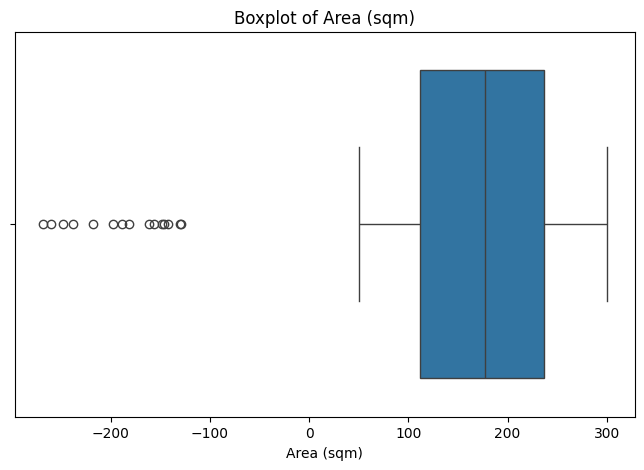

,Home_ID,State,City,Month,Avg_Daily_Temp,Area_sqm,Occupants,Has_Solar_Panels,Has_Battery_Storage,Energy_Efficiency_Rating,Appliance_Efficiency,Monthly_Consumption_kWh,Monthly_Cost
109,110,NSW,Sydney,6,16.2,-197.82,5.0,0,0,B,0.89,8604.15,567.87
117,118,NSW,Sydney,7,20.8,-259.95,5.0,0,0,B,0.60,8875.67,585.79
265,266,NSW,Sydney,3,17.3,-268.18,5.0,0,0,C,0.97,13590.85,897.00
1004,1005,QLD,Brisbane,9,24.6,-161.68,2.0,0,0,A,0.86,5312.07,350.60
1011,1012,QLD,Brisbane,7,16.0,-146.04,1.0,0,0,D,0.85,6341.42,418.53
1343,1344,QLD,Brisbane,9,25.3,-142.13,4.0,0,0,D,0.96,12488.68,824.25
1429,1430,QLD,Brisbane,2,27.8,-148.11,3.0,0,0,C,0.80,12772.37,842.98
1726,1727,WA,Perth,10,14.0,-237.77,3.0,0,0,C,0.86,11349.31,749.05
1763,1764,WA,Perth,3,14.2,-129.70,5.0,0,1,A,0.79,9156.71,604.34
1820,1821,WA,Perth,4,17.9,-188.75,4.0,0,0,D,0.79,12375.44,816.78


In [6]:
# Visualise the distribution of Area_sqm to detect any outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Area_sqm'])
plt.title('Boxplot of Area (sqm)')
plt.xlabel('Area (sqm)')
plt.show()

# Identify rows where Area_sqm is negative or zero (which doesn't make sense)
outliers_area = df[df['Area_sqm'] <= 0]

# Display the outliers (if any)
outliers_area

1.5.1 Remove Invalid Outliers in Area_sqm

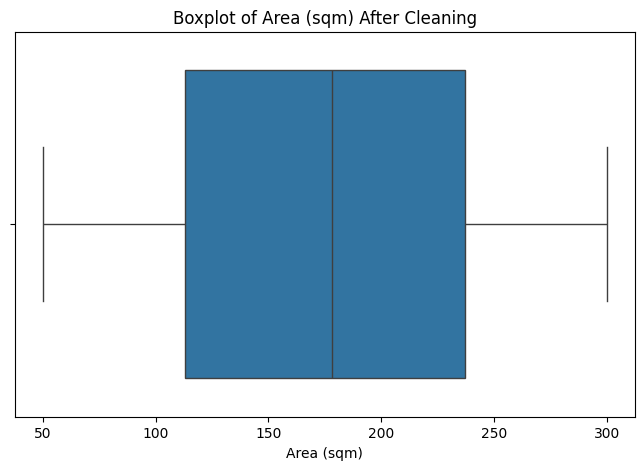

count    3950.000000
mean      175.871127
std        71.950072
min        50.030000
25%       112.885000
50%       177.990000
75%       237.250000
max       299.960000
Name: Area_sqm, dtype: float64

In [7]:
# Remove rows where Area_sqm is zero or negative
df = df[df['Area_sqm'] > 0]

# Confirm that outliers are removed by re-plotting
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Area_sqm'])
plt.title('Boxplot of Area (sqm) After Cleaning')
plt.xlabel('Area (sqm)')
plt.show()

# Quick check
df['Area_sqm'].describe()

1.6 Create New Features

In [8]:
# Create new meaningful variables

# 1. Energy consumption per square meter
df['Energy_per_sqm'] = df['Monthly_Consumption_kWh'] / df['Area_sqm']

# 2. Occupants per square meter
df['Occupants_per_sqm'] = df['Occupants'] / df['Area_sqm']

# 3. Monthly cost per kilowatt-hour
df['Cost_per_kWh'] = df['Monthly_Cost'] / df['Monthly_Consumption_kWh']

# View the first few rows to confirm new features
df[['Energy_per_sqm', 'Occupants_per_sqm', 'Cost_per_kWh']].head()

,Energy_per_sqm,Occupants_per_sqm,Cost_per_kWh
0,75.210411,0.052159,0.066000
1,34.189058,0.022024,0.066001
2,61.682963,0.024641,0.066000
3,83.679823,0.027729,0.066000
4,100.899789,0.060368,0.066000


 1.7 Encode Categorical Variables (Dummy Variables)

In [9]:
# Create dummy variables for State, City, and Energy_Efficiency_Rating
df = pd.get_dummies(df, columns=['State', 'City', 'Energy_Efficiency_Rating'], drop_first=True)

# Confirm the new shape and list of columns
df.shape, df.columns

((3950, 36),
 Index(['Home_ID', 'Month', 'Avg_Daily_Temp', 'Area_sqm', 'Occupants',
        'Has_Solar_Panels', 'Has_Battery_Storage', 'Appliance_Efficiency',
        'Monthly_Consumption_kWh', 'Monthly_Cost', 'Energy_per_sqm',
        'Occupants_per_sqm', 'Cost_per_kWh', 'State_NSW', 'State_NT',
        'State_QLD', 'State_SA', 'State_TAS', 'State_VIC', 'State_WA',
        'City_Brisban', 'City_Brisbane', 'City_Canberra', 'City_Darwin',
        'City_Hobart', 'City_Melborne', 'City_Melbourne', 'City_Perth',
        'City_Prth', 'City_Sydeny', 'City_Sydney', 'Energy_Efficiency_Rating_B',
        'Energy_Efficiency_Rating_C', 'Energy_Efficiency_Rating_D',
        'Energy_Efficiency_Rating_E', 'Energy_Efficiency_Rating_F'],
       dtype='object'))

1.7.1 Fix Dummy Column Names 

In [10]:
# Rename the columns correctly
df.rename(columns={
    'City_Brisban': 'City_Brisbane',
    'City_Melborne': 'City_Melbourne',
    'City_Prth': 'City_Perth',
    'City_Sydeny': 'City_Sydney'
}, inplace=True)

# Confirm changes
df.shape, df.columns

((3950, 36),
 Index(['Home_ID', 'Month', 'Avg_Daily_Temp', 'Area_sqm', 'Occupants',
        'Has_Solar_Panels', 'Has_Battery_Storage', 'Appliance_Efficiency',
        'Monthly_Consumption_kWh', 'Monthly_Cost', 'Energy_per_sqm',
        'Occupants_per_sqm', 'Cost_per_kWh', 'State_NSW', 'State_NT',
        'State_QLD', 'State_SA', 'State_TAS', 'State_VIC', 'State_WA',
        'City_Brisbane', 'City_Brisbane', 'City_Canberra', 'City_Darwin',
        'City_Hobart', 'City_Melbourne', 'City_Melbourne', 'City_Perth',
        'City_Perth', 'City_Sydney', 'City_Sydney',
        'Energy_Efficiency_Rating_B', 'Energy_Efficiency_Rating_C',
        'Energy_Efficiency_Rating_D', 'Energy_Efficiency_Rating_E',
        'Energy_Efficiency_Rating_F'],
       dtype='object'))

 1.7.2 Merge Duplicate Dummy Variables

In [11]:
# First, find all duplicated column names
duplicate_columns = df.columns[df.columns.duplicated()].unique()
print("Duplicated columns:", duplicate_columns)

# For each duplicated column, merge them
for col in duplicate_columns:
    cols_to_merge = [c for c in df.columns if c == col]
    df[col] = df[cols_to_merge].max(axis=1)
    df = df.drop(columns=cols_to_merge[1:])  # keep only one copy

# Confirm final structure
df.shape, df.columns

Duplicated columns: Index(['City_Brisbane', 'City_Melbourne', 'City_Perth', 'City_Sydney'], dtype='object')


((3950, 28),
 Index(['Home_ID', 'Month', 'Avg_Daily_Temp', 'Area_sqm', 'Occupants',
        'Has_Solar_Panels', 'Has_Battery_Storage', 'Appliance_Efficiency',
        'Monthly_Consumption_kWh', 'Monthly_Cost', 'Energy_per_sqm',
        'Occupants_per_sqm', 'Cost_per_kWh', 'State_NSW', 'State_NT',
        'State_QLD', 'State_SA', 'State_TAS', 'State_VIC', 'State_WA',
        'City_Canberra', 'City_Darwin', 'City_Hobart',
        'Energy_Efficiency_Rating_B', 'Energy_Efficiency_Rating_C',
        'Energy_Efficiency_Rating_D', 'Energy_Efficiency_Rating_E',
        'Energy_Efficiency_Rating_F'],
       dtype='object'))

2. Exploratory Data Analysis (EDA)

2.1 Statistical Summaries

In [12]:
# Separate numerical features (excluding dummy variables)
numerical_features = df[['Month', 'Avg_Daily_Temp', 'Area_sqm', 'Occupants',
                         'Has_Solar_Panels', 'Has_Battery_Storage', 'Appliance_Efficiency',
                         'Monthly_Consumption_kWh', 'Monthly_Cost',
                         'Energy_per_sqm', 'Occupants_per_sqm', 'Cost_per_kWh']]

# Separate categorical dummy features
dummy_features = df.drop(columns=numerical_features.columns).drop(columns=['Home_ID'])

# Numerical features summary
numerical_summary = numerical_features.describe()

# Categorical (dummy) features summary
categorical_summary = dummy_features.describe()

# Display
numerical_summary, categorical_summary

(             Month  Avg_Daily_Temp     Area_sqm    Occupants  \
 count  3950.000000     3950.000000  3950.000000  3950.000000   
 mean      6.453924       18.637241   175.871127     3.039747   
 std       3.430794       11.661692    71.950072     1.418037   
 min       1.000000        5.200000    50.030000     1.000000   
 25%       3.000000       13.900000   112.885000     2.000000   
 50%       6.000000       17.500000   177.990000     3.000000   
 75%       9.000000       21.700000   237.250000     4.000000   
 max      12.000000      228.000000   299.960000     5.000000   
 
        Has_Solar_Panels  Has_Battery_Storage  Appliance_Efficiency  \
 count       3950.000000          3950.000000           3950.000000   
 mean           0.195696             0.101013              0.751171   
 std            0.396786             0.301384              0.142148   
 min            0.000000             0.000000              0.500000   
 25%            0.000000             0.000000             

2.2 Distribution Visualisations

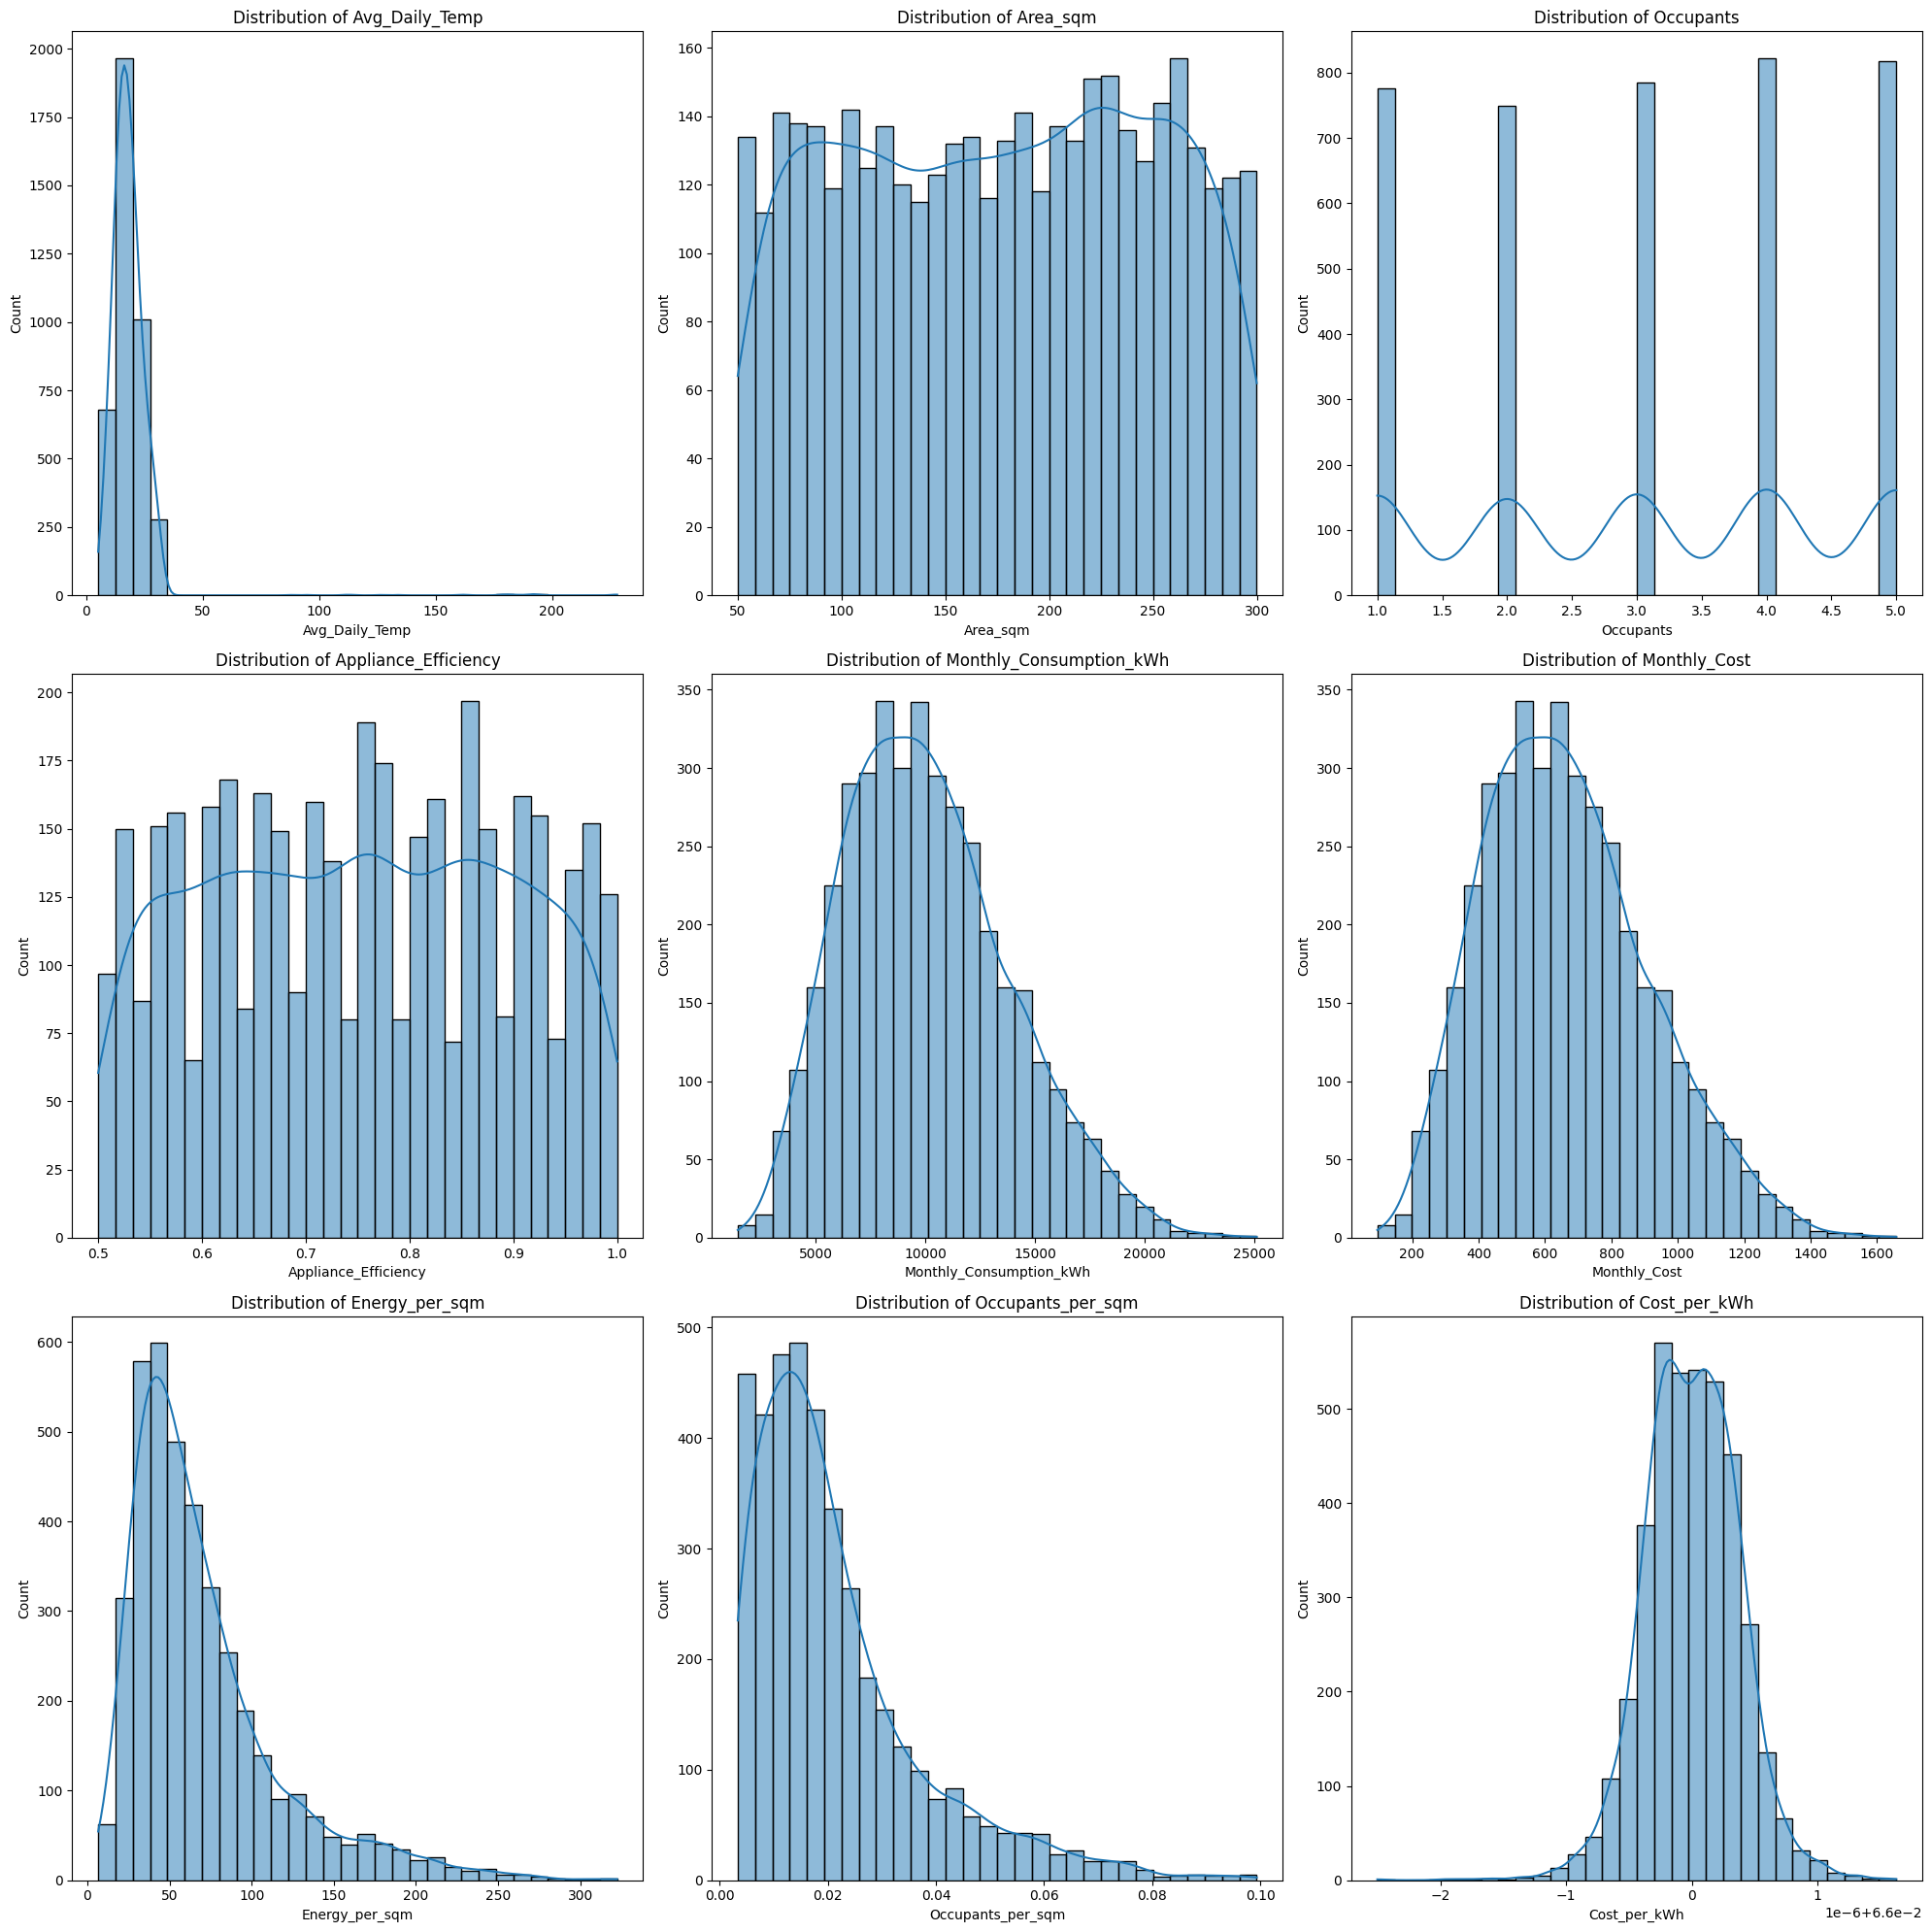

In [13]:
# List of important numerical features to plot
important_numerical = ['Avg_Daily_Temp', 'Area_sqm', 'Occupants',
                       'Appliance_Efficiency', 'Monthly_Consumption_kWh', 'Monthly_Cost',
                       'Energy_per_sqm', 'Occupants_per_sqm', 'Cost_per_kWh']

# Create histograms
plt.figure(figsize=(20, 20))

for idx, feature in enumerate(important_numerical):
    plt.subplot(3, 3, idx+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

2.3 Visualise Relationships (Scatterplots)

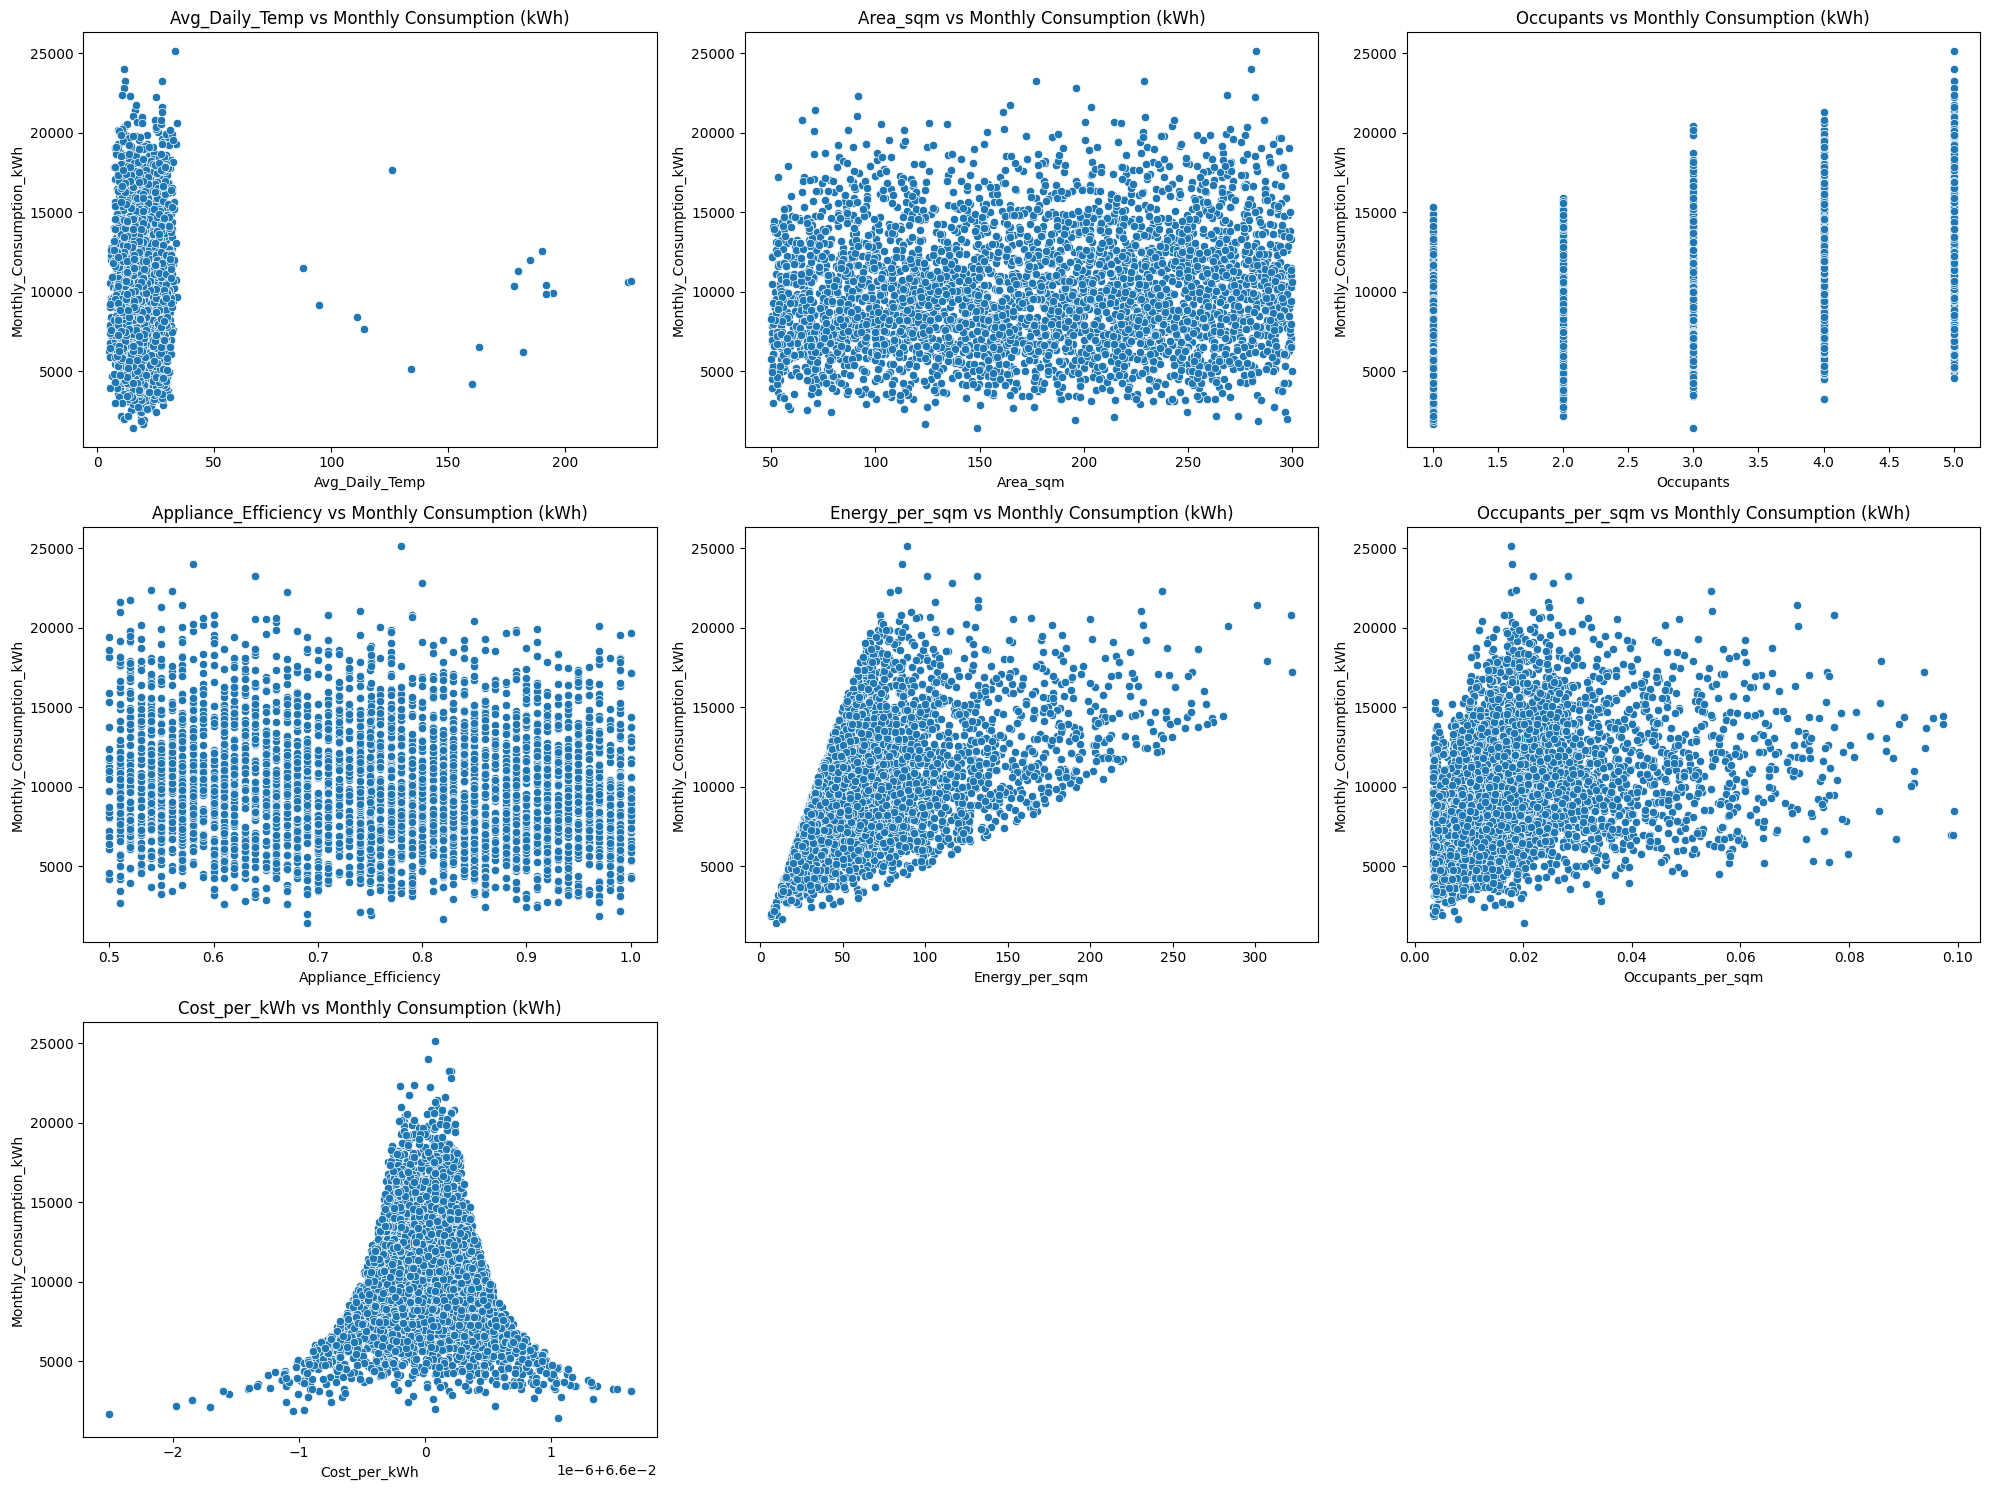

In [14]:
# List of important numerical features to check relationship with target
features_to_plot = ['Avg_Daily_Temp', 'Area_sqm', 'Occupants',
                    'Appliance_Efficiency', 'Energy_per_sqm', 'Occupants_per_sqm', 'Cost_per_kWh']

# Create scatterplots
plt.figure(figsize=(20, 15))

for idx, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, idx+1)
    sns.scatterplot(x=df[feature], y=df['Monthly_Consumption_kWh'])
    plt.title(f'{feature} vs Monthly Consumption (kWh)')
    plt.xlabel(feature)
    plt.ylabel('Monthly_Consumption_kWh')

plt.tight_layout()
plt.show()

2.4 Correlation Heatmap

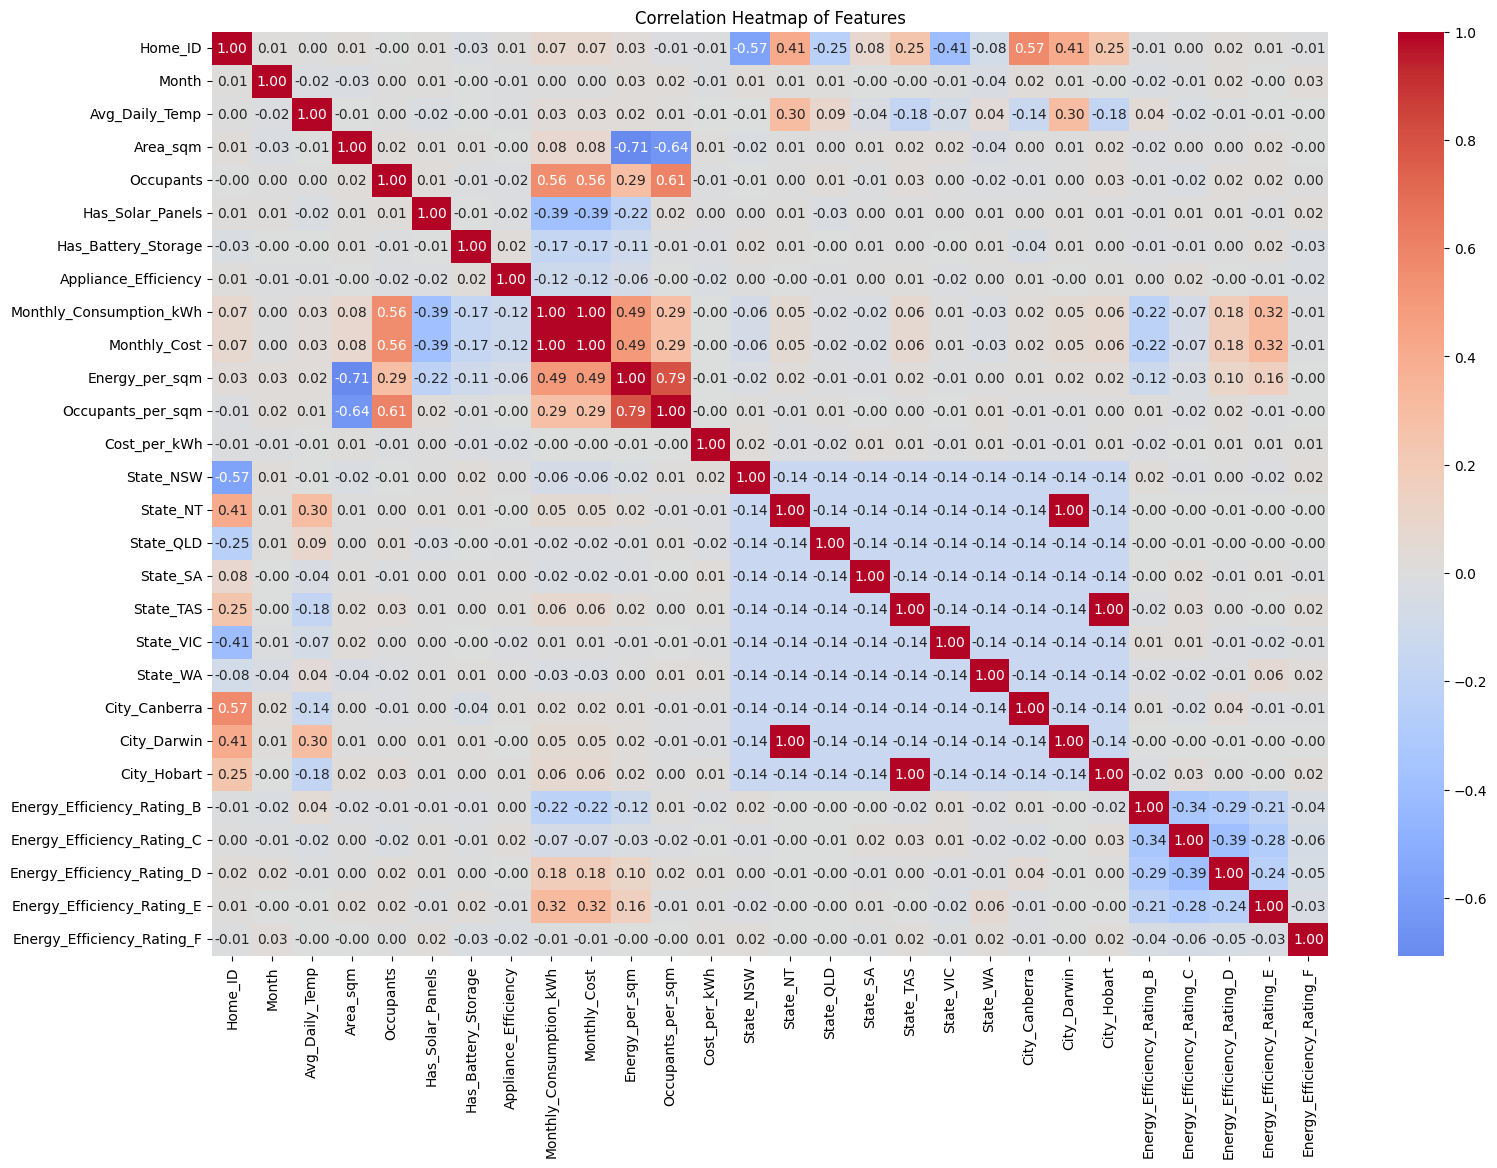

In [15]:
# Create a correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

2.5 Clean Temperature Outlier

In [16]:
# Replace temperatures greater than 50°C with NaN
df['Avg_Daily_Temp'] = df['Avg_Daily_Temp'].apply(lambda x: np.nan if x > 50 else x)

# Fill missing temperatures with the median of valid values
df['Avg_Daily_Temp'] = df['Avg_Daily_Temp'].fillna(df['Avg_Daily_Temp'].median())

# Confirm that the fix worked
df['Avg_Daily_Temp'].describe()

count    3950.000000
mean       17.972684
std         5.688192
min         5.200000
25%        13.900000
50%        17.500000
75%        21.600000
max        34.000000
Name: Avg_Daily_Temp, dtype: float64

3. Data Preprocessing

3.1 Select Final Features

In [ ]:
# Drop irrelevant identifier column
df_model = df.drop(columns=['Home_ID'])

# Define target variable
y = df_model['Monthly_Consumption_kWh']

# Drop target from features
X = df_model.drop(columns=['Monthly_Consumption_kWh'])

# Check shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (3950, 26)
Target vector shape: (3950,)


3.2 Feature Scaling

In [ ]:
!pip install scikit-learn

In [20]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding dummies)
numerical_cols = ['Month', 'Avg_Daily_Temp', 'Area_sqm', 'Occupants',
                  'Appliance_Efficiency', 'Monthly_Cost',
                  'Energy_per_sqm', 'Occupants_per_sqm', 'Cost_per_kWh']

# Create a copy to avoid changing original data
X_scaled = X.copy()

# Apply StandardScaler
scaler = StandardScaler()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Preview the scaled data
X_scaled[numerical_cols].head()

,Month,Avg_Daily_Temp,Area_sqm,Occupants,Appliance_Efficiency,Monthly_Cost,Energy_per_sqm,Occupants_per_sqm,Cost_per_kWh
0,0.159189,0.180628,-1.112178,1.382546,-0.148958,-0.765234,0.097798,1.913122,0.655186
1,-0.423840,0.180628,0.710984,1.382546,-1.133974,-0.618311,-0.790412,0.033083,1.507148
2,-0.423840,0.215793,0.375848,1.382546,-1.274691,0.647209,-0.195104,0.196349,-0.414793
3,1.616762,1.182831,-0.940787,-0.028033,1.258209,-0.274496,0.281181,0.388972,0.256661
4,0.159189,-0.927070,-1.523626,0.677257,-1.696841,-0.904736,0.654034,2.425251,-0.368490


 3.3 Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3160, 26)
X_test shape: (790, 26)
y_train shape: (3160,)
y_test shape: (790,)
